In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import scipy.stats as stats

In [2]:
def import_into_df(year_list):

    for yr in year_list:
        filepath = f'data/{yr}.tsv'
        df = pd.read_csv(filepath,sep='\t')
        df['SEASON'] = yr
        
        if yr == year_list[0]:
            out = df
        else:
            out = out.append(df, ignore_index=True)
    return out
    

In [3]:
years = list(range(2019,1995,-1))
nba = import_into_df(years)
nba

,TEAM,MATCH UP,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,SEASON
0,OKC,OKC @ LAC,08/14/2020,L,53,103,38,106,35.8,14,...,11,37,48,18,16,5,6,29,-4,2019
1,DEN,DEN @ TOR,08/14/2020,L,48,109,36,87,41.4,16,...,9,32,41,27,16,9,11,15,-8,2019
2,LAC,LAC vs. OKC,08/14/2020,W,53,107,34,85,40.0,12,...,12,49,61,23,23,10,2,22,4,2019
3,TOR,TOR vs. DEN,08/14/2020,W,48,117,45,90,50.0,18,...,13,38,51,27,19,8,5,24,8,2019
4,HOU,HOU vs. PHI,08/14/2020,L,48,96,35,80,43.8,12,...,1,26,27,25,17,10,9,18,-38,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56627,MIA,MIA vs. ATL,11/01/1996,W,48,94,35,78,44.9,10,...,13,27,40,26,19,8,4,25,13,1996
56628,VAN,VAN vs. POR,11/01/1996,L,48,85,34,77,44.2,5,...,9,18,27,23,16,7,5,21,-29,1996
56629,MIN,MIN vs. SAS,11/01/1996,W,48,82,31,74,41.9,3,...,9,27,36,18,18,6,12,13,4,1996
56630,HOU,HOU vs. SAC,11/01/1996,W,48,96,34,87,39.1,8,...,17,28,45,25,23,20,1,19,11,1996


In [5]:
nba.columns

Index(['TEAM', 'MATCH UP', 'GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'SEASON'],
      dtype='object')

In [79]:
# Extracting opponent
nba['OPPONENT'] = nba['MATCH UP'].str[-3:]
# Extracting home/away
conditions = [
            (nba['MATCH UP'].str[4] == 'v'),
            (nba['MATCH UP'].str[4] == '@')
            ]
values = ['HOME', 'AWAY']
nba['HOME/AWAY'] = np.select(conditions, values)

#Reordering columns and excluding obsolete MATCH UP column
nba = nba[['TEAM','HOME/AWAY','OPPONENT','GAME DATE', 'W/L', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'PF', '+/-', 'SEASON']]

In [80]:
nba

,TEAM,HOME/AWAY,OPPONENT,GAME DATE,W/L,MIN,PTS,FGM,FGA,FG%,...,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-,SEASON
0,OKC,AWAY,LAC,08/14/2020,L,53,103,38,106,35.8,...,11,37,48,18,16,5,6,29,-4,2019
1,DEN,AWAY,TOR,08/14/2020,L,48,109,36,87,41.4,...,9,32,41,27,16,9,11,15,-8,2019
2,LAC,HOME,OKC,08/14/2020,W,53,107,34,85,40.0,...,12,49,61,23,23,10,2,22,4,2019
3,TOR,HOME,DEN,08/14/2020,W,48,117,45,90,50.0,...,13,38,51,27,19,8,5,24,8,2019
4,HOU,HOME,PHI,08/14/2020,L,48,96,35,80,43.8,...,1,26,27,25,17,10,9,18,-38,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56627,MIA,HOME,ATL,11/01/1996,W,48,94,35,78,44.9,...,13,27,40,26,19,8,4,25,13,1996
56628,VAN,HOME,POR,11/01/1996,L,48,85,34,77,44.2,...,9,18,27,23,16,7,5,21,-29,1996
56629,MIN,HOME,SAS,11/01/1996,W,48,82,31,74,41.9,...,9,27,36,18,18,6,12,13,4,1996
56630,HOU,HOME,SAC,11/01/1996,W,48,96,34,87,39.1,...,17,28,45,25,23,20,1,19,11,1996


In [214]:
win = nba[nba['W/L']=='W']
lose = nba[nba['W/L']=='L']

In [213]:
win_ = nba[nba['W/L']=='W']
lose_ = nba[nba['W/L']=='L']
win_.columns = ['W_'+x for x in win_.columns]
lose_.columns = ['L_'+x for x in lose_.columns]

matchups = pd.merge(win_, lose_,  how='inner', left_on=['W_OPPONENT','W_GAME DATE'], right_on = ['L_TEAM','L_GAME DATE'])
matchups

,W_TEAM,W_HOME/AWAY,W_OPPONENT,W_GAME DATE,W_W/L,W_MIN,W_PTS,W_FGM,W_FGA,W_FG%,...,L_OREB,L_DREB,L_REB,L_AST,L_TOV,L_STL,L_BLK,L_PF,L_+/-,L_SEASON
0,LAC,HOME,OKC,08/14/2020,W,53,107,34,85,40.0,...,11,37,48,18,16,5,6,29,-4,2019
1,TOR,HOME,DEN,08/14/2020,W,48,117,45,90,50.0,...,9,32,41,27,16,9,11,15,-8,2019
2,PHI,AWAY,HOU,08/14/2020,W,48,134,49,87,56.3,...,1,26,27,25,17,10,9,18,-38,2019
3,IND,HOME,MIA,08/14/2020,W,48,109,43,89,48.3,...,14,34,48,14,19,6,5,15,-17,2019
4,SAC,AWAY,LAL,08/13/2020,W,48,136,54,95,56.8,...,15,32,47,29,17,6,1,18,-14,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28311,CLE,AWAY,NJN,11/01/1996,W,48,90,34,72,47.2,...,11,24,35,13,22,7,7,19,-13,1996
28312,MIA,HOME,ATL,11/01/1996,W,48,94,35,78,44.9,...,10,30,40,13,24,10,7,20,-13,1996
28313,MIN,HOME,SAS,11/01/1996,W,48,82,31,74,41.9,...,9,31,40,21,18,10,4,23,-4,1996
28314,HOU,HOME,SAC,11/01/1996,W,48,96,34,87,39.1,...,8,32,40,18,27,11,8,24,-11,1996


In [186]:
def scatter_win_lose(col1, col2, year_list, ax,marker_size,alpha):
    df = nba[nba['SEASON'].isin(year_list)]
    win = df[df['W/L'] == 'W']
    lose = df[df['W/L'] == 'L']
    
    ax.scatter(lose[col1],lose[col2],label = 'Lose',alpha=alpha,s=marker_size)
    ax.scatter(win[col1],win[col2],label = 'Win',alpha=alpha,s=marker_size)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(', '.join(map(str,year_list)))

Text(0.5, 1.0, '')

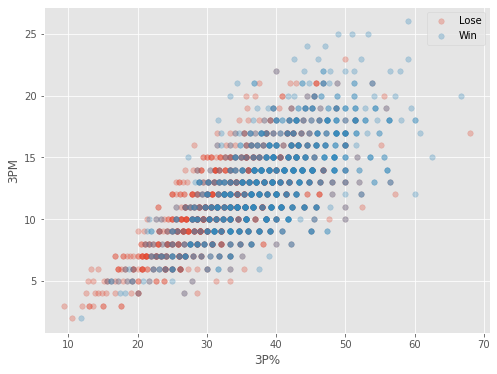

In [228]:
fig, ax = plt.subplots(figsize=(8,6))
scatter_win_lose('3P%','3PM',[2019],ax,30,0.3)
ax.legend()
ax.set_title('')
#plt.savefig('plots/scatter_3p%_3pm.png')

In [188]:
def scatter_WL_subplots(col1,col2,marker_size,alpha):
    years = list(range(1996,2020))
    fig, ax = plt.subplots(4,6,figsize=(18,12))
    for i,year in enumerate(years):
        scatter_win_lose(col1,col2,[year],ax[i//6][i%6],marker_size,alpha)
    fig.tight_layout()

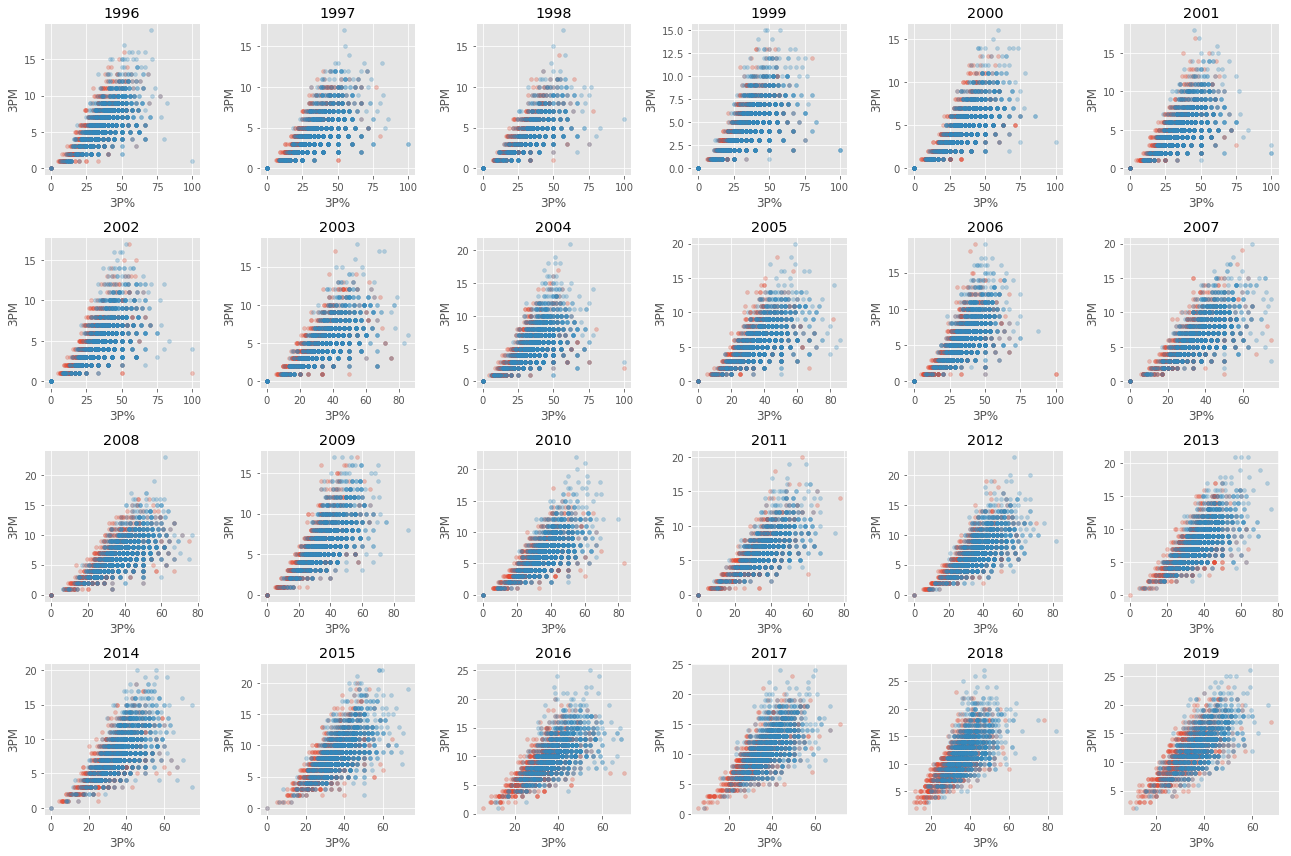

In [195]:
scatter_WL_subplots('3P%','3PM',15,0.3)
#plt.savefig('plots/scatter_sub_3p%_3pm')

In recent years, we see a larger separation between winners and losers, as the 3-point shot has become a stronger deciding factor in who wins and loses. We also begin to see a stronger correlation between 3 pointers made and 3 point %. This can be explained by $all$ teams taking many 3 point shots in modern games. In earlier eras some teams may have made more 3 pointers by virtue of shooting many more, instead of shooting more accurately, making for a looser correlation. 

In [334]:
def hist_win_lose(col, year_list, ax, bins):
    df = nba[nba['SEASON'].isin(year_list)]
    win = df[df['W/L'] == 'W']
    lose = df[df['W/L'] == 'L']
    
    ax.hist(lose[col], label = 'Lose',alpha=0.5,bins=bins)
    ax.hist(win[col],label = 'Win',alpha=0.5,bins=bins)
    
    ax.set_xlabel(col)
    ax.set_title(', '.join(map(str,year_list)))
    

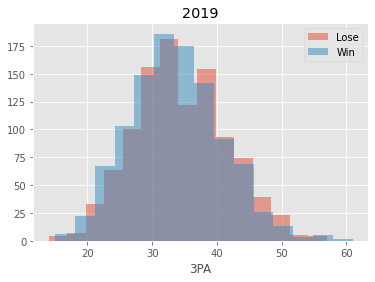

In [335]:
fig, ax = plt.subplots()
hist_win_lose('3PA',[2019],ax,15)
ax.legend()

In [336]:
def hist_WL_subplots(col,bins):
    years = list(range(1996,2020))
    fig, ax = plt.subplots(6,4,figsize=(15,15))
    for i,year in enumerate(years):
        hist_win_lose(col,[year],ax[i//4][i%4],bins)
        ax[i//4][i%4].set_ylabel('Frequency')
    fig.tight_layout()

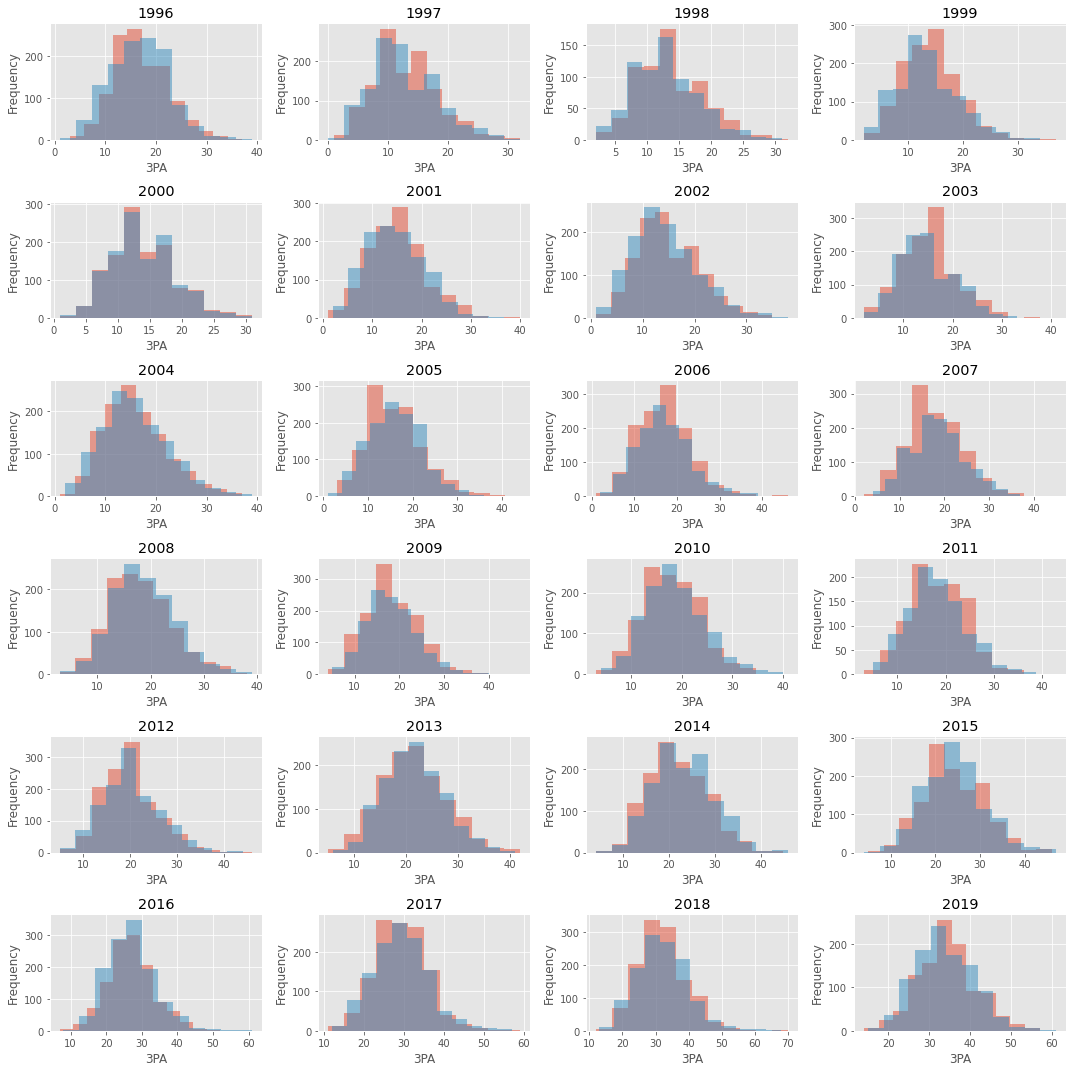

In [338]:
hist_WL_subplots('3PA',12)

In [14]:
avgs = nba.groupby(['SEASON']).mean().reset_index()

In [15]:
avgs

,SEASON,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,1996,48.374264,96.899075,36.069807,79.305719,45.597981,6.047939,16.796047,35.807948,18.711522,...,73.689655,12.665685,28.418839,41.084525,22.043734,15.666106,8.203953,4.908326,22.109336,0.0
1,1997,48.370059,95.571489,35.905383,79.703953,45.195837,4.394449,12.713625,33.975189,19.366274,...,73.725315,13.050042,28.496215,41.546257,22.029437,15.487805,8.383936,5.072330,22.404121,0.0
2,1998,48.365517,91.580690,34.171724,78.191034,43.842759,4.457241,13.157931,33.258138,18.780000,...,72.824828,12.584138,29.065517,41.649655,20.722759,15.324138,8.353793,4.962759,22.210345,0.0
3,1999,48.298570,97.472246,36.833894,82.094197,44.981455,4.841463,13.715307,35.024432,18.962994,...,75.156854,12.415896,30.503364,42.919260,22.338520,15.470143,7.934399,5.169470,23.300252,0.0
4,2000,48.403701,94.810345,35.687553,80.598823,44.417283,4.846089,13.707738,34.857569,18.589151,...,74.862069,11.992431,30.474769,42.467199,21.777544,15.048360,7.821699,5.258621,22.348192,0.0
5,2001,48.332212,95.476451,36.169470,81.271236,44.618503,5.215307,14.749369,35.156686,17.922204,...,75.222498,12.234651,30.165685,42.400336,21.922204,14.460471,7.794365,5.224558,21.235071,0.0
6,2002,48.394449,95.080740,35.717830,80.785955,44.309125,5.130362,14.681665,34.353070,18.514718,...,75.824222,12.049622,30.256518,42.306140,21.502523,14.916316,7.941127,5.015980,21.753574,0.0
7,2003,48.340622,93.397813,35.010513,79.816232,43.940454,5.181665,14.925568,34.302103,18.195122,...,75.218966,12.091253,30.112700,42.203953,21.302775,14.975189,7.931876,5.055509,21.449117,0.0
8,2004,48.373984,97.198780,35.949187,80.335772,44.859350,5.600407,15.751220,35.164065,19.700000,...,75.609228,12.009756,29.847967,41.857724,21.277236,14.502846,7.515854,4.863008,22.630488,0.0
9,2005,48.418699,97.008537,35.839837,78.989431,45.486667,5.726016,15.980894,35.474878,19.602846,...,74.420000,11.174797,29.781707,40.956504,20.614228,14.414228,7.167480,4.698780,22.758537,0.0


In [215]:
win = nba[nba['W/L']=='W']
lose = nba[nba['W/L']=='L']
w_avgs = win.groupby(['SEASON']).mean().reset_index()
l_avgs = lose.groupby(['SEASON']).mean().reset_index()

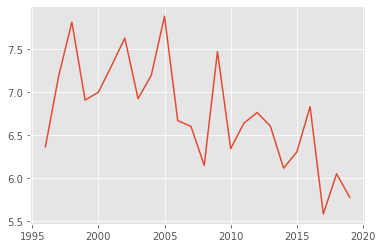

In [339]:

plt.plot(w_avgs['SEASON'],w_avgs['3P%']-l_avgs['3P%'])


Text(2013, 37, 'Warriors Champions')

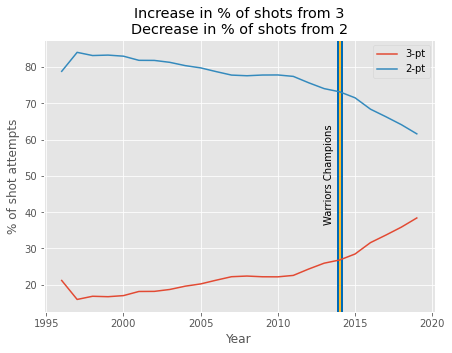

In [217]:
fig,ax = plt.subplots(figsize=(7,5))
ax.axvline(2014,color='#006BB6',linewidth=6)
ax.axvline(2014,color='#FDB927',linewidth=2)
ax.plot(avgs['SEASON'],avgs['3PA']/avgs['FGA']*100,label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGA']-avgs['3PA'])/avgs['FGA']*100,label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('% of shot attempts')
ax.legend()
ax.set_title('Increase in % of shots from 3\nDecrease in % of shots from 2')
plt.text(2013,37,'Warriors Champions',rotation=90)
#plt.savefig('plots/pct_of_shots')

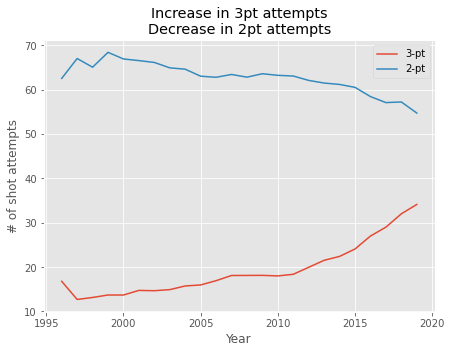

In [221]:
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(avgs['SEASON'],avgs['3PA'],label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGA']-avgs['3PA']),label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('# of shot attempts')
ax.legend()
ax.set_title('Increase in 3pt attempts\nDecrease in 2pt attempts')
plt.savefig('plots/num_shot_attempts')

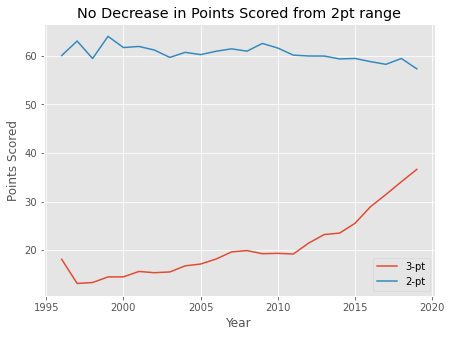

In [223]:
fig,ax = plt.subplots(figsize=(7,5))

ax.plot(avgs['SEASON'],avgs['3PM']*3,label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGM']-avgs['3PM'])*2,label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('Points Scored')
ax.legend()
ax.set_title('No Decrease in Points Scored from 2pt range')
plt.savefig('plots/num_points_scored.png')

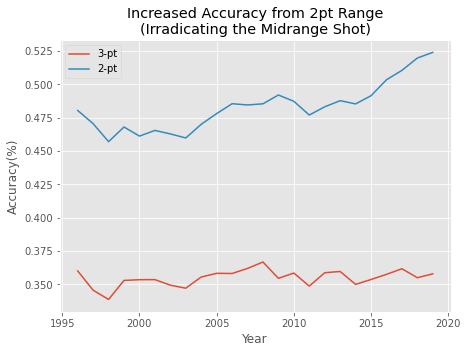

In [226]:
fig,ax = plt.subplots(figsize=(7,5))
ax.plot(avgs['SEASON'],avgs['3PM']/avgs['3PA'],label='3-pt')
ax.plot(avgs['SEASON'],(avgs['FGM']-avgs['3PM'])/(avgs['FGA']-avgs['3PA']),label='2-pt')
ax.set_xlabel('Year')
ax.set_ylabel('Accuracy(%)')
ax.legend()
ax.set_title('Increased Accuracy from 2pt Range\n(Irradicating the Midrange Shot)')
plt.savefig('plots/accuracy.png')

In [223]:
stats.ttest_ind(win[win['SEASON']==2019]['3P%'],lose[lose['SEASON']==2019]['3P%'])

Ttest_indResult(statistic=16.524361277063104, pvalue=8.728606157230028e-58)

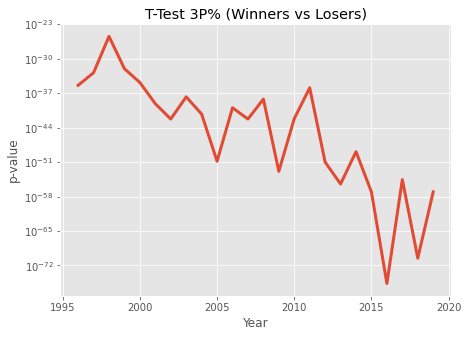

In [227]:
years = list(range(1996,2020))
ttests = []
for year in years:
    pval = stats.ttest_ind(win[win['SEASON']==year]['3P%'],lose[lose['SEASON']==year]['3P%'])[1]
    ttests.append(pval)
fig, ax = plt.subplots(figsize=(7,5))
# ax.axvline(2014,color='#006BB6',linewidth=6)
# ax.axvline(2014,color='#FDB927',linewidth=2)
ax.plot(years,ttests,linewidth=3)
# plt.text(2013,10**(-76),'Warriors Win',rotation=90)
ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('p-value')
ax.set_title('T-Test 3P% (Winners vs Losers)')
#plt.savefig('plots/ttest_3ppct')
#plt.savefig('plots/ttest_3ppct_warriors')

Text(0.5, 1.0, 'T-Test 3PA (Winners vs Losers)')

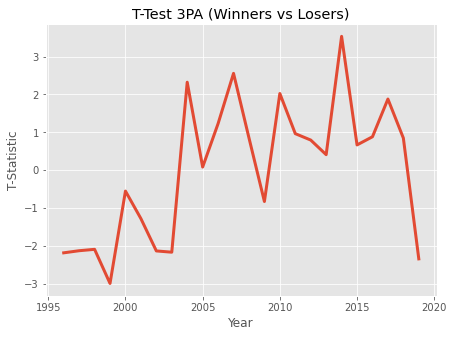

In [244]:
years = list(range(1996,2020))
ttests = []
for year in years:
    pval = stats.ttest_ind(win[win['SEASON']==year]['3PA'],lose[lose['SEASON']==year]['3PA'])[0]
    ttests.append(pval)
fig, ax = plt.subplots(figsize=(7,5))
# ax.axvline(2014,color='#006BB6',linewidth=6)
# ax.axvline(2014,color='#FDB927',linewidth=2)
ax.plot(years,ttests,linewidth=3)
# plt.text(2013,10**(-76),'Warriors Win',rotation=90)
#ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('T-Statistic')
ax.set_title('T-Test 3PA (Winners vs Losers)')

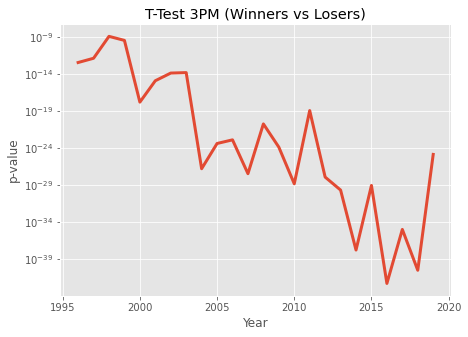

In [139]:
years = list(range(1996,2020))
ttests = []
for year in years:
    pval = stats.ttest_ind(win[win['SEASON']==year]['3PM'],lose[lose['SEASON']==year]['3PM'])[1]
    ttests.append(pval)
fig, ax = plt.subplots(figsize=(7,5))
# ax.axvline(2014,color='#006BB6',linewidth=6)
# ax.axvline(2014,color='#FDB927',linewidth=2)
ax.plot(years,ttests,linewidth=3)
#plt.text(2013,10**(-25),'Warriors Win',rotation=90)
ax.set_yscale('log')
ax.set_xlabel('Year')
ax.set_ylabel('p-value')
ax.set_title('T-Test 3PM (Winners vs Losers)')
#plt.savefig('plots/ttest_3pm_warriors')
plt.savefig('plots/ttest_3pm')

Text(0.5, 0, 'Year')

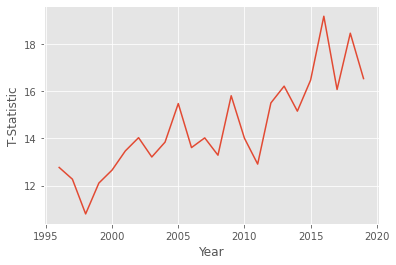

In [240]:
years = list(range(1996,2020))
ttests = []
for year in years:
    pval = stats.ttest_ind(win[win['SEASON']==year]['3P%'],lose[lose['SEASON']==year]['3P%'])[0]
    ttests.append(pval)
fig, ax = plt.subplots()
ax.plot(years,ttests)
ax.set_ylabel('T-Statistic')
ax.set_xlabel('Year')


In [95]:
matchups.head()

,W_TEAM,W_HOME/AWAY,W_OPPONENT,W_GAME DATE,W_W/L,W_MIN,W_PTS,W_FGM,W_FGA,W_FG%,...,L_OREB,L_DREB,L_REB,L_AST,L_TOV,L_STL,L_BLK,L_PF,L_+/-,L_SEASON
0,LAC,HOME,OKC,08/14/2020,W,53,107,34,85,40.0,...,11,37,48,18,16,5,6,29,-4,2019
1,TOR,HOME,DEN,08/14/2020,W,48,117,45,90,50.0,...,9,32,41,27,16,9,11,15,-8,2019
2,PHI,AWAY,HOU,08/14/2020,W,48,134,49,87,56.3,...,1,26,27,25,17,10,9,18,-38,2019
3,IND,HOME,MIA,08/14/2020,W,48,109,43,89,48.3,...,14,34,48,14,19,6,5,15,-17,2019
4,SAC,AWAY,LAL,08/13/2020,W,48,136,54,95,56.8,...,15,32,47,29,17,6,1,18,-14,2019


In [100]:
matchups['3%DIFF'] = matchups['W_3P%'] - matchups['L_3P%']
matchups['3PMDIFF'] = matchups['W_3PM'] - matchups['L_3PM']
matchup_avgs = matchups.groupby(['W_SEASON']).mean().reset_index()
matchup_avgs

,W_SEASON,W_MIN,W_PTS,W_FGM,W_FGA,W_FG%,W_3PM,W_3PA,W_3P%,W_FTM,...,L_REB,L_AST,L_TOV,L_STL,L_BLK,L_PF,L_+/-,L_SEASON,3%DIFF,3PMDIFF
0,1996,48.374264,102.391926,37.950378,78.762826,48.276535,6.470143,16.553406,38.989907,20.021026,...,39.510513,20.250631,16.259882,7.590412,4.499579,22.854500,-10.985702,1996.0,6.363919,0.844407
1,1997,48.370059,101.126156,37.826745,79.120269,47.946846,4.768713,12.482759,37.566779,20.703953,...,39.804878,19.983179,16.001682,7.890664,4.679563,23.132885,-11.109336,1997.0,7.183179,0.748528
2,1998,48.365517,96.822069,35.849655,77.315862,46.517655,4.862069,12.881379,37.162897,20.260690,...,40.339310,19.016552,15.846897,7.903448,4.449655,23.097931,-10.482759,1998.0,7.809517,0.809655
3,1999,48.298570,102.915896,38.803196,81.628259,47.629184,5.179983,13.390244,38.477124,20.129521,...,41.522288,20.246426,16.110177,7.352397,4.587048,23.782170,-10.887300,1999.0,6.905383,0.677040
4,2000,48.403701,100.109336,37.576955,80.026913,47.095542,5.310345,13.651808,38.355509,19.645080,...,40.907485,19.963835,15.474348,7.446594,4.705635,22.915055,-10.597981,2000.0,6.995879,0.928511
5,2001,48.332212,100.888982,38.047939,80.772077,47.199243,5.674516,14.600505,38.808747,19.118587,...,41.043734,20.141295,15.084104,7.317914,4.840202,21.858705,-10.825063,2001.0,7.304121,0.918419
6,2002,48.394449,100.436501,37.554247,80.213625,46.910261,5.582002,14.422204,38.165097,19.746005,...,40.913373,19.884777,15.489487,7.507149,4.636669,22.405383,-10.711522,2002.0,7.624054,0.903280
7,2003,48.340622,98.571068,36.850294,79.455845,46.468461,5.614802,14.682086,37.763246,19.255677,...,40.637511,19.552565,15.590412,7.411270,4.657696,22.132885,-10.346510,2003.0,6.922288,0.866274
8,2004,48.373984,102.356911,37.563415,79.704878,47.238130,6.266667,16.043902,38.760000,20.963415,...,40.460976,19.732520,14.999187,7.135772,4.453659,23.287805,-10.316260,2004.0,7.191870,1.332520
9,2005,48.418699,102.195122,37.501626,78.578049,47.833577,6.326829,15.991057,39.413659,20.865041,...,39.234959,19.000813,14.834146,6.952033,4.230081,23.639837,-10.373171,2005.0,7.877561,1.201626


Text(0.5, 0, 'Season')

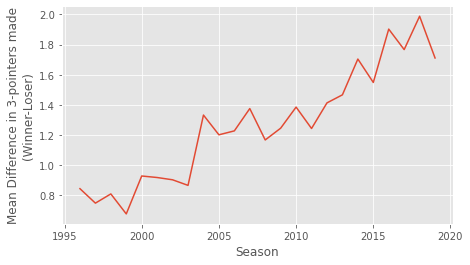

In [341]:
fig,ax = plt.subplots(figsize=(7,4))
ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['3PMDIFF'])
#ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['W_+/-'])
ax.set_ylabel('Mean Difference in 3-pointers made\n(Winner-Loser)')
ax.set_xlabel('Season')

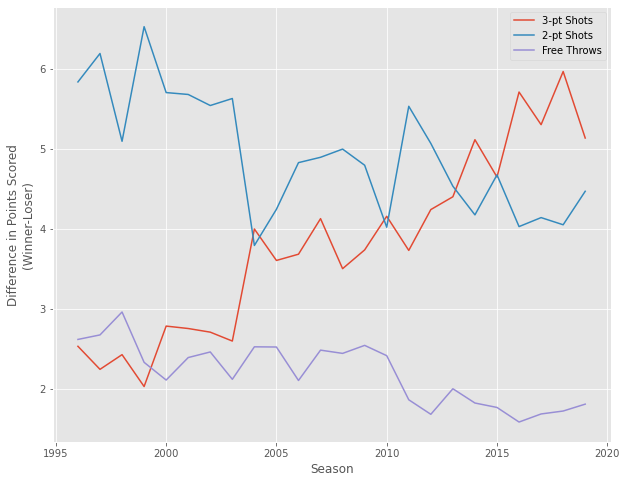

In [125]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['3PMDIFF']*3,label='3-pt Shots')
ax.plot(matchup_avgs['W_SEASON'],((matchup_avgs['W_FGM']-matchup_avgs['W_3PM'])-(matchup_avgs['L_FGM']-matchup_avgs['L_3PM']))*2,label='2-pt Shots')
#ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['W_+/-'],label='Total Points')
ax.plot(matchup_avgs['W_SEASON'],matchup_avgs['W_FTM']-matchup_avgs['L_FTM'],label='Free Throws')
ax.set_ylabel('Difference in Points Scored\n(Winner-Loser)')
ax.set_xlabel('Season')
ax.legend()
#plt.savefig('plots/diff_points_scored')

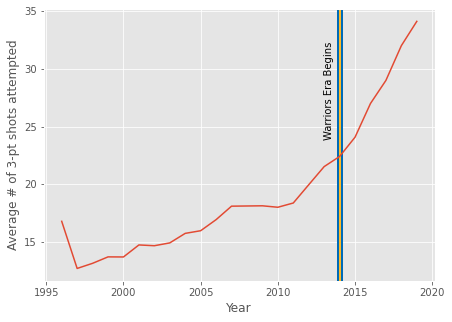

In [211]:
fig,ax = plt.subplots(figsize=(7,5))
ax.axvline(2014,color='#006BB6',linewidth=6)
ax.axvline(2014,color='#FDB927',linewidth=2)
ax.plot(avgs.SEASON, avgs['3PA'])
ax.set_xlabel('Year')
ax.set_ylabel('Average # of 3-pt shots attempted')
plt.text(2013,24,'Warriors Era Begins',rotation=90)
plt.savefig('plots/num_3_pt_shots')

In [246]:
home = nba[nba['HOME/AWAY']=='HOME']
away = nba[nba['HOME/AWAY']=='AWAY']

In [247]:
def scatter_home_away(col1, col2, year_list, ax,marker_size,alpha):
    df = nba[nba['SEASON'].isin(year_list)]
    home = nba[nba['HOME/AWAY']=='HOME']
    away = nba[nba['HOME/AWAY']=='AWAY']
    
    ax.scatter(away[col1],away[col2],label = 'Away',alpha=alpha,s=marker_size)
    ax.scatter(home[col1],home[col2],label = 'Home',alpha=alpha,s=marker_size)
    
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(', '.join(map(str,year_list)))

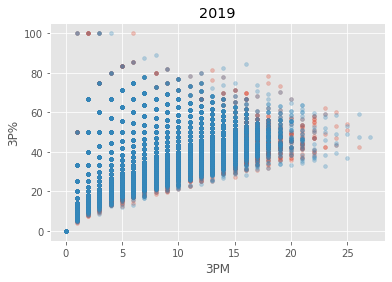

In [249]:
fig,ax = plt.subplots()
scatter_home_away('3PM','3P%',[2019],ax,15,0.3)

In [251]:
def hist_home_away(col, year_list, ax, bins):
    df = nba[nba['SEASON'].isin(year_list)]
    home = nba[nba['HOME/AWAY']=='HOME']
    away = nba[nba['HOME/AWAY']=='AWAY']
    
    ax.hist(away[col], label = 'Away',alpha=0.5,bins=bins)
    ax.hist(home[col],label = 'Home',alpha=0.5,bins=bins)
    
    ax.set_xlabel(col)
    ax.set_title(', '.join(map(str,year_list)))

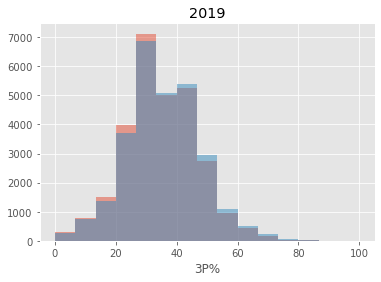

In [252]:
fig,ax = plt.subplots()
hist_home_away('3P%',[2019],ax,15)

In [256]:
stats.ttest_ind(home[home.SEASON==2019]['3P%'],away[away.SEASON==2019]['3P%'])

Ttest_indResult(statistic=1.991134165619837, pvalue=0.04659453131051349)

In [257]:
stats.ttest_ind(home['3P%'],away['3P%'])

Ttest_indResult(statistic=8.081227083447942, pvalue=6.537339781266746e-16)

In [327]:
def ttest_winlose_plot_2tail(year_list, col, ax, stat = 'p'):
    pvals = []
    tstats = []
    for year in year_list:
        tstat, pval = stats.ttest_ind(win[win['SEASON']==year][col],lose[lose['SEASON']==year][col])
        pvals.append(pval)
        tstats.append(tstat)
    # ax.axvline(2014,color='#006BB6',linewidth=6)
    # ax.axvline(2014,color='#FDB927',linewidth=2)
    if stat == 'p':
        ax.plot(years,pvals,linewidth=3)
        ax.set_ylabel('p-value')
    elif stat == 't':
        ax.plot(years,tstats,linewidth=3)
        ax.set_ylabel('t-statistic')
    # plt.text(2013,10**(-76),'Warriors Win',rotation=90)
    ax.set_yscale('log')
    ax.set_xlabel('Year')
    
    ax.set_title(f'T-Test {col} (Winners vs Losers)')

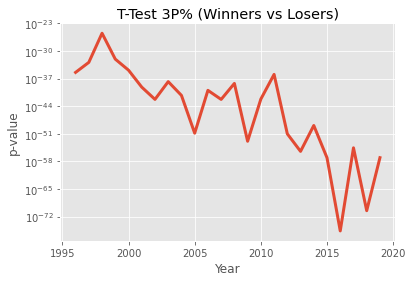

In [328]:
years = list(range(1996,2020))
fig,ax = plt.subplots()
ttest_winlose_plot_2tail(years,'3P%',ax,'p')

In [329]:
def ttest_winlose_plot_1tail(year_list, col, ax, stat = 'p'):
    pvals = []
    tstats = []
    for year in year_list:
        tstat, pval = stats.ttest_ind(win[win['SEASON']==year][col],lose[lose['SEASON']==year][col])
        pval = pval/2
        if tstat < 0:
            pval = 1-pval
        pvals.append(pval)
        tstats.append(tstat)
    # ax.axvline(2014,color='#006BB6',linewidth=6)
    # ax.axvline(2014,color='#FDB927',linewidth=2)
    if stat == 'p':
        ax.plot(years,pvals,linewidth=3)
        ax.set_ylabel('p-value')
    elif stat == 't':
        ax.plot(years,tstats,linewidth=3)
        ax.set_ylabel('t-statistic')
    # plt.text(2013,10**(-76),'Warriors Win',rotation=90)
    ax.set_yscale('log')
    ax.set_xlabel('Year')
    
    ax.set_title(f'T-Test {col} (Winners vs Losers)')

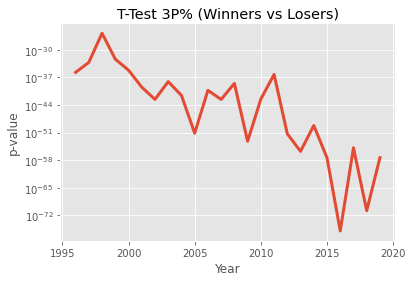

In [330]:
years = list(range(1996,2020))
fig,ax = plt.subplots()
ttest_winlose_plot_1tail(years,'3P%',ax,'p')

In [325]:
def ttest_homeaway_plot_2tail(year_list, col, ax, stat = 'p',scale='linear'):
    pvals = []
    tstats = []
    for year in year_list:
        tstat, pval = stats.ttest_ind(home[home['SEASON']==year][col],away[away['SEASON']==year][col])
        pvals.append(pval)
        tstats.append(tstat)
    # ax.axvline(2014,color='#006BB6',linewidth=6)
    # ax.axvline(2014,color='#FDB927',linewidth=2)
    if stat == 'p':
        ax.plot(years,pvals,linewidth=3)
        ax.set_ylabel('p-value')
    elif stat == 't':
        ax.plot(years,tstats,linewidth=3)
        ax.set_ylabel('t-statistic')
    # plt.text(2013,10**(-76),'Warriors Win',rotation=90)
    if scale == 'log':
        ax.set_yscale('log')
    ax.set_xlabel('Year')
    
    ax.set_title(f'T-Test {col} (Home vs Away)')

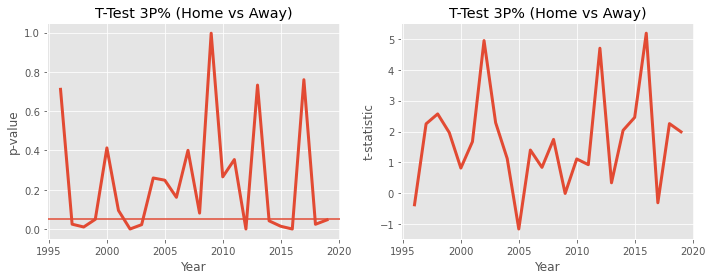

In [326]:
years = list(range(1996,2020))
fig,ax = plt.subplots(1,2,figsize=(10,4))
ttest_homeaway_plot_2tail(years,'3P%',ax[0],'p')
ttest_homeaway_plot_2tail(years,'3P%',ax[1],'t')
ax[0].axhline(0.05)
fig.tight_layout()

In [323]:
def ttest_homeaway_plot_1tail(year_list, col, ax, stat = 'p',scale='linear'):
    pvals = []
    tstats = []
    for year in year_list:
        tstat, pval = stats.ttest_ind(home[home['SEASON']==year][col],away[away['SEASON']==year][col])
        pval = pval/2
        if tstat < 0:
            pval = 1-pval
        pvals.append(pval)
        tstats.append(tstat)
    # ax.axvline(2014,color='#006BB6',linewidth=6)
    # ax.axvline(2014,color='#FDB927',linewidth=2)
    if stat == 'p':
        ax.plot(years,pvals,linewidth=3)
        ax.set_ylabel('p-value')
    elif stat == 't':
        ax.plot(years,tstats,linewidth=3)
        ax.set_ylabel('t-statistic')
    # plt.text(2013,10**(-76),'Warriors Win',rotation=90)
    if scale == 'log':
        ax.set_yscale('log')
    ax.set_xlabel('Year')
    
    ax.set_title(f'T-Test {col} (Home vs Away)')

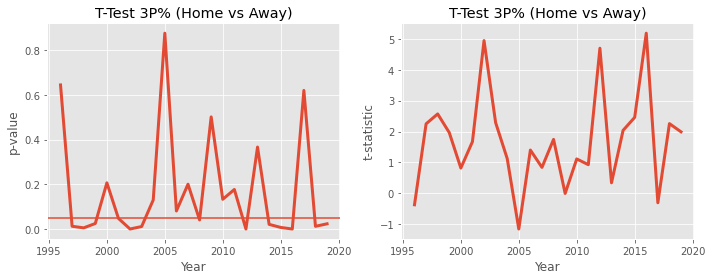

In [324]:
years = list(range(1996,2020))
fig,ax = plt.subplots(1,2,figsize=(10,4))
ttest_homeaway_plot_1tail(years,'3P%',ax[0],'p')
ttest_homeaway_plot_1tail(years,'3P%',ax[1],'t')
ax[0].axhline(0.05)
fig.tight_layout()

In [367]:
nba2 = nba.copy()
conditions = [
            (nba2['W/L'] == 'W'),
            (nba2['W/L'] == 'L')
            ]
values = [1, 0]
nba2['WIN'] = np.select(conditions, values)
nba2['GAMES'] = 1
nba_sums = nba2.groupby(['SEASON','TEAM']).sum()
nba_sums['WIN%'] = nba_sums['WIN']/nba_sums['GAMES']
nba_sums['3P%'] = nba_sums['3PM']/nba_sums['3PA']
nba_sums['FG%'] = nba_sums['FGM']/nba_sums['FGA']
nba_sums['FT%'] = nba_sums['FTM']/nba_sums['FTA']
nba_sums = nba_sums.reset_index()
nba_sums

,SEASON,TEAM,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,REB,AST,TOV,STL,BLK,PF,+/-,WIN,GAMES,WIN%
0,1996,ATL,3961,7774,2812,6307,0.445854,659,1833,0.359520,...,3371,1557,1228,701,427,1591,446,56,82,0.682927
1,1996,BOS,3981,8248,3066,6967,0.440075,467,1331,0.350864,...,3282,1792,1342,811,315,1915,-601,15,82,0.182927
2,1996,CHH,3961,8108,2988,6342,0.471145,591,1382,0.427641,...,3208,2021,1203,597,349,1702,153,54,82,0.658537
3,1996,CHI,3946,8458,3277,6923,0.473350,523,1403,0.372773,...,3696,2142,1109,717,332,1617,886,69,82,0.841463
4,1996,CLE,3971,7173,2704,5972,0.452780,483,1284,0.376168,...,3068,1714,1188,657,315,1882,151,42,82,0.512195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,2019,SAC,3491,7927,2943,6364,0.462445,914,2511,0.363998,...,3067,1713,1043,556,293,1595,-147,31,72,0.430556
708,2019,SAS,3443,8098,2995,6350,0.471654,760,2021,0.376051,...,3170,1751,895,518,390,1377,-79,32,71,0.450704
709,2019,TOR,3476,8118,2897,6331,0.457590,995,2663,0.373639,...,3268,1816,1067,636,358,1559,449,53,72,0.736111
710,2019,UTA,3471,8013,2886,6130,0.470799,963,2537,0.379582,...,3233,1615,1089,438,292,1468,178,44,72,0.611111


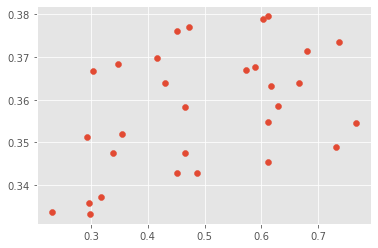

In [370]:
plt.scatter(nba_sums[nba_sums.SEASON==2019]['WIN%'],nba_sums[nba_sums.SEASON==2019]['3P%'])

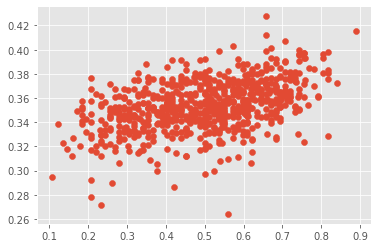

In [371]:
plt.scatter(nba_sums['WIN%'],nba_sums['3P%'])

In [378]:
nba['TEAM'].unique()

array(['OKC', 'DEN', 'LAC', 'TOR', 'HOU', 'PHI', 'IND', 'MIA', 'NOP',
       'BOS', 'SAS', 'SAC', 'LAL', 'MEM', 'WAS', 'POR', 'PHX', 'ORL',
       'BKN', 'DAL', 'UTA', 'MIL', 'DET', 'NYK', 'CHA', 'ATL', 'GSW',
       'MIN', 'CLE', 'CHI', 'NOH', 'NJN', 'SEA', 'NOK', 'CHH', 'VAN'],
      dtype=object)

In [483]:
# Building Dictionary of Team Colors 
# Team color hex codes from https://teamcolorcodes.com/nba-team-color-codes/
color_d = {}
color_d['OKC'] = ['#EF3B24','#007AC1']
color_d['DEN'] = ['#FEC524','#0E2240']
color_d['LAC'] = ['#C8102E','#1D428A']
color_d['TOR'] = ['#CE1141','#000000']
color_d['HOU'] = ['#000000','#CE1141']
color_d['PHI'] = ['#006BB6','#ED174C']
color_d['IND'] = ['#002D62','#FDBB30']
color_d['MIA'] = ['#98002E','#F9A01B']
color_d['NOP'] = ['#0C2340','#85714D']
color_d['BOS'] = ['#007A33','#BA9653']
color_d['SAS'] = ['#C4CED4','#000000']
color_d['SAC'] = ['#5A2D81','#63727A']
color_d['LAL'] = ['#552583','#FDB927']
color_d['MEM'] = ['#5D76A9','#12173F']
color_d['WAS'] = ['#002B5C','#E31837']
color_d['POR'] = ['#E03A3E','#000000']
color_d['PHX'] = ['#1D1160','#E56020']
color_d['ORL'] = ['#0077C0','#C4CED4']
color_d['BKN'] = ['#000000','#FFFFFF']
color_d['DAL'] = ['#00538C','#002B5E']
color_d['UTA'] = ['#002B5C','#00471B']
color_d['MIL'] = ['#00471B','#EEE1C6']
color_d['DET'] = ['#C8102E','#1D42BA']
color_d['NYK'] = ['#006BB6','#F58426']
color_d['CHA'] = ['#1D1160','#00788C']
color_d['ATL'] = ['#E03A3E','#C1D32F']
color_d['GSW'] = ['#006BB6','#FDB927']
color_d['MIN'] = ['#0C2340','#78BE20']
color_d['CLE'] = ['#860038','#FDBB30']
color_d['CHI'] = ['#CE1141','#FFFFFF']
color_d['NOH'] = ['#98002E','#F9A01B']
color_d['NJN'] = ['#000000','#FFFFFF']
color_d['SEA'] = ['#00653A','#FFC200']
color_d['NOK'] = ['#0C2340','#85714D']
color_d['CHH'] = ['#1D1160','#00788C']
color_d['VAN'] = ['#5D76A9','#12173F']


In [488]:
def plot_w_team_colors(year,col1,col2):
    season = nba_sums[nba_sums.SEASON==year]
    for team in season['TEAM'].unique():
        t_df = season[season['TEAM']==team]
        ax.scatter(t_df[col1],t_df[col2],color=color_d[team][1],edgecolor=color_d[team][0],s=300,linewidths=5,label=team)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=10)
    ax.set_xlabel(col1)
    ax.set_ylabel(col2)

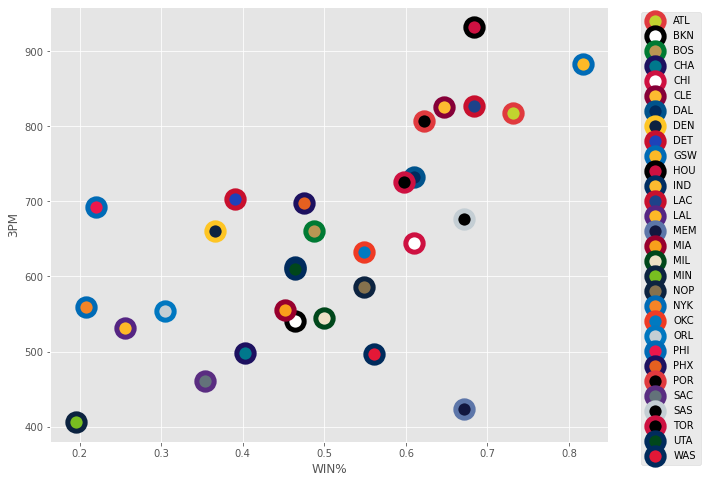

In [536]:
fig,ax = plt.subplots(figsize=(10,8))
plot_w_team_colors(2014,'WIN%','3PM')

In [511]:
def corr_plot(year_list,col1,col2,ax):
    corr_list = []
    for year in year_list:
        season = nba_sums[nba_sums.SEASON==year]
        corr = np.corrcoef(season[col1],season[col2])[0][1]
        corr_list.append(corr)
    ax.plot(year_list,corr_list)
    ax.set_xlabel('Season')
    ax.set_ylabel(f'Correlation Coefficient\n({col1} and {col2})')

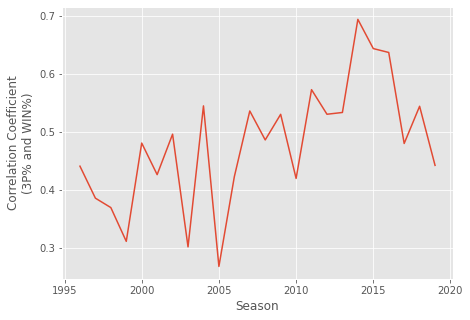

In [514]:
years = list(range(1996,2020))
fig,ax = plt.subplots(figsize=(7,5))
corr_plot(years,'3P%','WIN%',ax)
fig.savefig('plots/corr_3P%_WIN%.png')

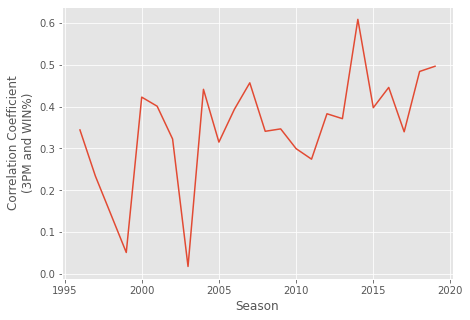

In [519]:
fig,ax = plt.subplots(figsize=(7,5))
corr_plot(years,'3PM','WIN%',ax)
fig.savefig('plots/corr_3PM_WIN%.png')

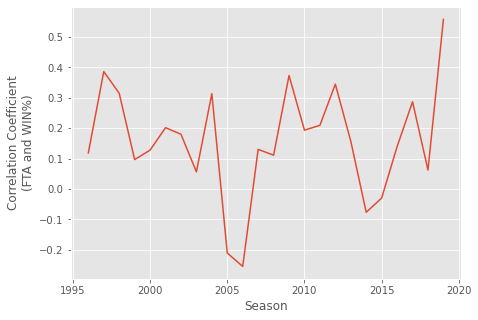

In [520]:
fig,ax = plt.subplots(figsize=(7,5))
corr_plot(years,'FTA','WIN%',ax)

In [525]:
def corr_print(col1,col2):
    c = np.corrcoef(nba_sums[col1],nba_sums[col2])[0][1]
    print(f'Overall correlation coefficient between {col1} and {col2}: {c}')

In [529]:
for col in ['3P%','FG%','FT%']:
    corr_print(col,'WIN%')

Overall correlation coefficient between 3P% and WIN%: 0.44478046455801856
Overall correlation coefficient between FG% and WIN%: 0.5888332606266471
Overall correlation coefficient between FT% and WIN%: 0.13517375456760652
